In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('../data/avocado.csv')

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


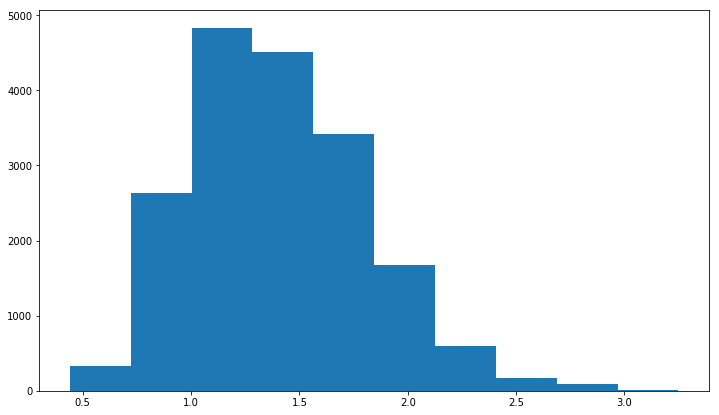

In [15]:
plt.figure(figsize=(12,7))
plt.hist(df.AveragePrice);

In [46]:
data = (
        
    df.loc[:,['year','AveragePrice']]
    .groupby('year',as_index=False)
    .mean()
    .assign(year = lambda df: df.year.astype(str))
    .sort_values('AveragePrice',ascending=False)
    
)

data

,year,AveragePrice
2,2017,1.515128
0,2015,1.375590
3,2018,1.347531
1,2016,1.338640


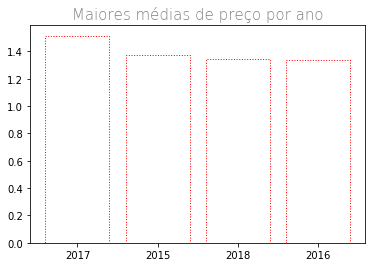

In [72]:
chart = plt.bar(x = data.year, height = data.AveragePrice,edgecolor='red',fill=False,ls=':')
plt.title('Maiores médias de preço por ano',fontdict={'fontsize':15,'fontweight':100,'alpha':0.5})

plt.show()

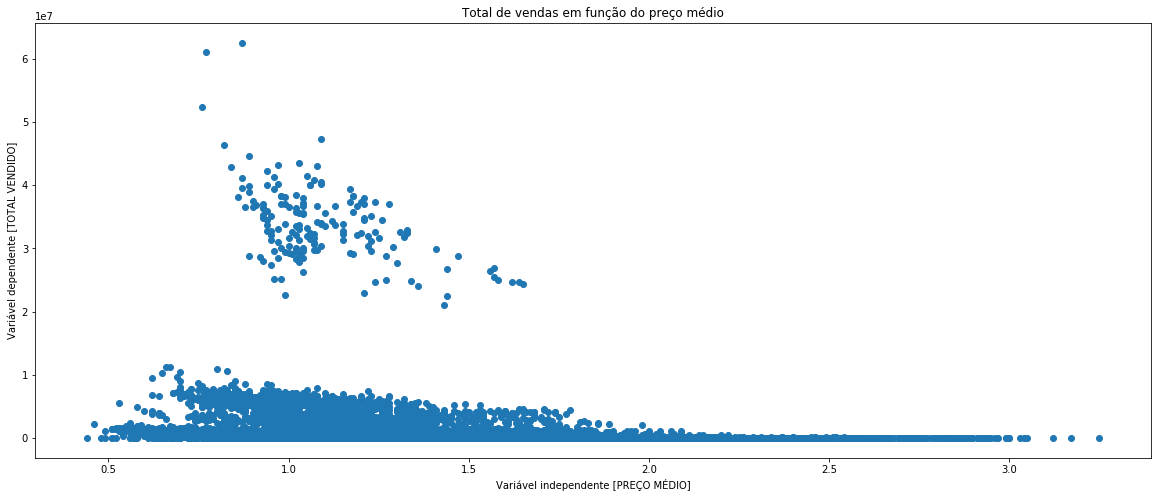

In [95]:
plt.figure(figsize=(20,8))

plt.scatter(x = df.AveragePrice, y = df['Total Volume'])    ## criando o gráfico de dispersão

plt.xlabel('Variável independente [PREÇO MÉDIO]')           ## colocando label no eixo X
plt.ylabel('Variável dependente [TOTAL VENDIDO]')           ## colocando label no eixo y

plt.title('Total de vendas em função do preço médio')
plt.show()

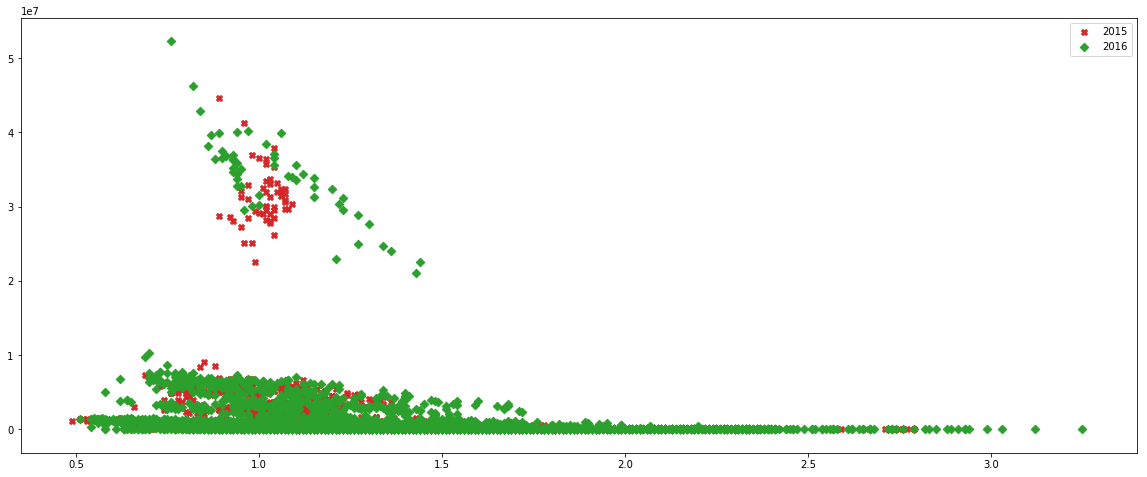

In [117]:
plt.figure(figsize=(20,8))

dados15 = df[df.year == 2015]
plt.scatter(x = dados15.AveragePrice, y = dados15['Total Volume'], label='2015', c = 'tab:red', marker='X')

dados16 = df[df.year == 2016]
plt.scatter(x = dados16.AveragePrice, y = dados16['Total Volume'], label='2016', c = 'tab:green', marker='D')

plt.legend()

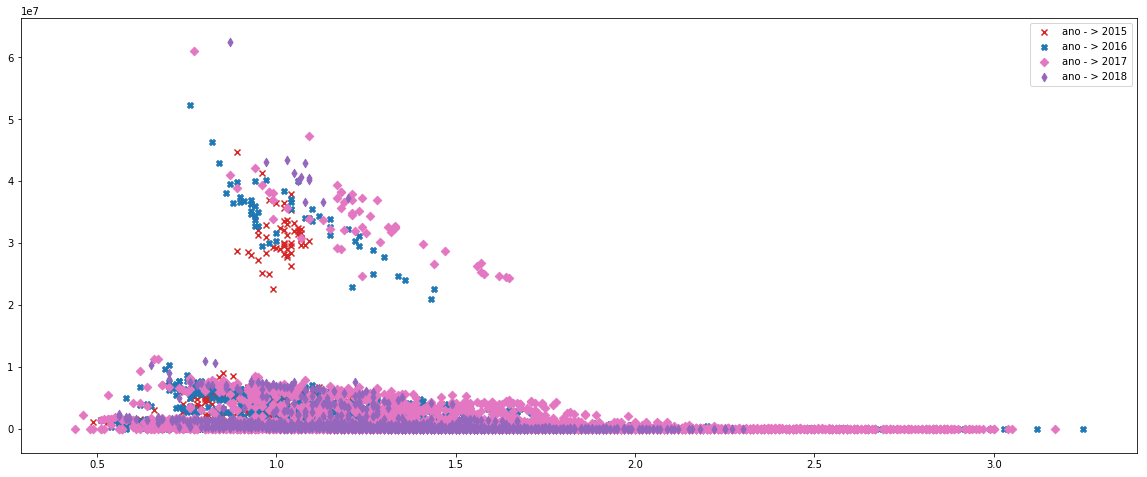

In [119]:
plt.figure(figsize=(20,8))

ls_color = ['tab:red','tab:blue','tab:pink','tab:purple']
ls_marker = ['x','X','D','d']

for idx,ano in enumerate(df.year.unique()):
    dado = df[df.year == ano]
    plt.scatter(x = dado.AveragePrice, y = dado['Total Volume'], label = f'ano - > {ano}', 
                color = ls_color[idx], marker= ls_marker[idx])

plt.legend()

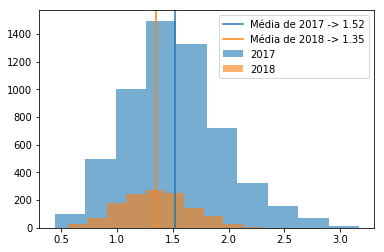

In [152]:
plt.figure()

colors = ['tab:blue','tab:orange']

for idx,ano in enumerate(df.year.unique()[2:]):
    dado = df[df.year == ano]                             ## filtrando o dataset
    media = dado.AveragePrice.mean()                      ## encontra a media de AveragePrice
    plt.hist(dado.AveragePrice,label=f'{ano}',alpha=0.6, color = colors[idx])  ## cria o histograma
    plt.axvline(x=media,color = colors[idx],label=f'Média de {ano} -> {round(media,2)}') ## cria a linha no eixo X na coordenada guardada na variável média
    
plt.legend()

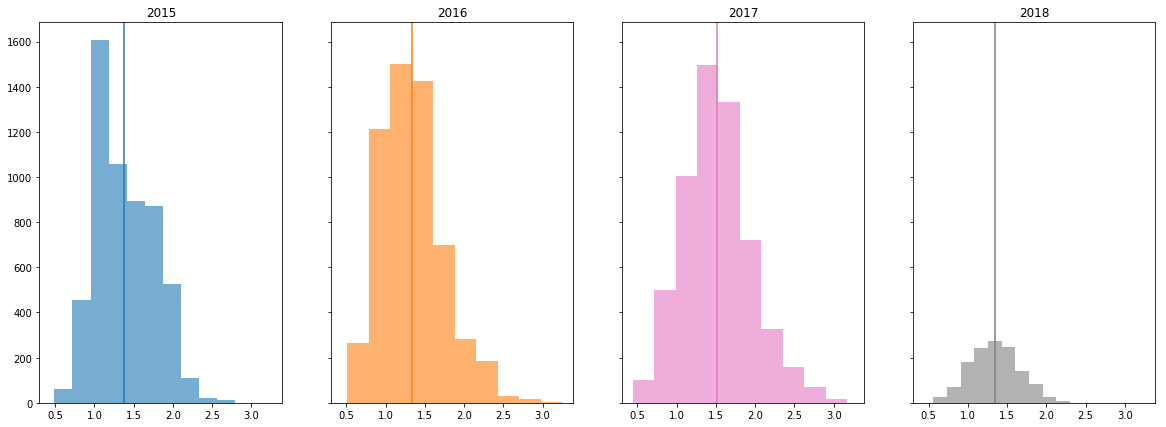

In [168]:
f, ax = plt.subplots(nrows=1,ncols=4,figsize=(20,7),sharex=True,sharey=True)

colors = ['tab:blue','tab:orange','tab:pink','tab:grey']

for idx,ano in enumerate(df.year.unique()):
    dado = df[df.year == ano]                             ## filtrando o dataset
    media = dado.AveragePrice.mean()                      ## encontra a media de AveragePrice
    ax[idx].hist(dado.AveragePrice,label=f'{ano}',alpha=0.6, color = colors[idx])  ## cria o histograma
    ax[idx].axvline(x=media,color = colors[idx]) ## cria a linha no eixo X na coordenada guardada na variável média
    ax[idx].set_title(f'{ano}')

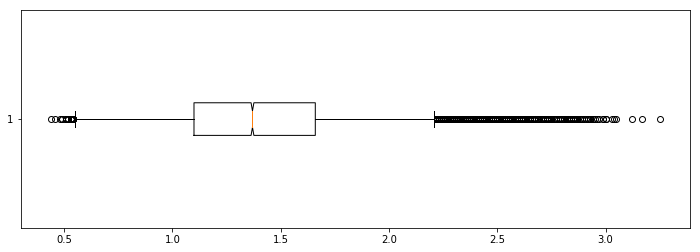

In [215]:
plt.figure(figsize=(12,4))
box_dict = plt.boxplot(df.AveragePrice,vert=False,notch=True,whis=1)

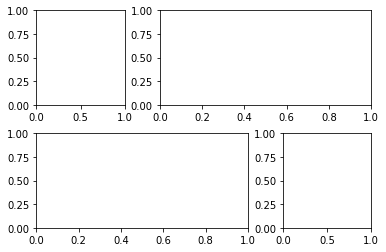

In [190]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)


plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

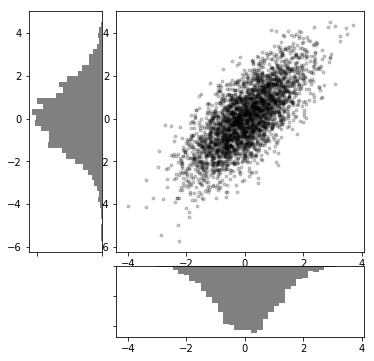

In [192]:
import numpy as np

# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

In [176]:
date_range = (
    df[['Total Volume','Date']]
    .assign(Date = lambda x: pd.to_datetime(x.Date))
)

In [177]:
date_range['year'] = date_range.Date.dt.year
date_range['week'] = date_range.Date.dt.week

/home/nasserboan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [183]:
date_range[date_range.year == 2015].Date.max() - date_range[date_range.year == 2015].Date.min()

Timedelta('357 days 00:00:00')

In [184]:
date_range[date_range.year == 2016].Date.max() - date_range[date_range.year == 2016].Date.min()

Timedelta('357 days 00:00:00')

In [185]:
date_range[date_range.year == 2017].Date.max() - date_range[date_range.year == 2017].Date.min()

Timedelta('364 days 00:00:00')

In [186]:
date_range[date_range.year == 2018].Date.max() - date_range[date_range.year == 2018].Date.min()

Timedelta('77 days 00:00:00')